## Analysis of data of Moignard *et al.*, Nat. Biotechn. (2015)

Much more explanation on the given problem is found [here](README.md).

This has been published by [Haghverdi *et al.*, Nat. Meth. (2016)](http://dx.doi.org/10.1038/nmeth.3971) together with a Matlab implementation of Diffusion Pseudotime. The data is from [Moignard *et al.*, Nat. Biotechn. (2015)](http://dx.doi.org/10.1038/nbt.3154).

In [1]:
%config InlineBackend.figure_formats = ['retina']  # increase resolution on retina screens
import numpy as np
import scanpy.api as sc

sc.sett.verbosity = 3                # show some output
sc.sett.set_dpi(80)                  # low pixel number yields small inline figures
sc.sett.file_format_figures = 'png'  # set this to 'svg' (notebook) or 'pdf' (files) if you want vector graphics
sc.sett.savefigs = False             # set to True if you want to save figures to `./figs/`

In [2]:
print('running Scanpy version', sc.__version__, 'on', sc.logging.get_date())

running Scanpy version 0.1+37.gd0e15c7 on 2017-05-23 13:52


1. Filter out a few genes.
2. Choose a 'root cell'.                                                                                                                                                           
3. Define groupnames by inspecting cellnames.                                                                                                                                    

In [3]:
filename = 'data/moignard15/nbt.3154-S3.xlsx'
backup_url = 'http://www.nature.com/nbt/journal/v33/n3/extref/nbt.3154-S3.xlsx'
adata = sc.read(filename, sheet='dCt_values.txt', backup_url=backup_url)
# filter out genes as done by Haghverdi et al. (2016)
removed_genes = np.in1d(adata.var_names, ['Eif2b1', 'Mrpl19', 'Polr2a', 'Ubc'])
adata = adata[:, ~removed_genes]  # retain non-removed genes
# choose root cell as in Haghverdi et al. (2016)
adata.add['xroot'] = adata.X[532] # note that in Matlab/R, counting starts at 1
# annotate with Moignard et al. (2015) experimental cell groups
groups_names = ['HF', 'NP', 'PS', '4SG', '4SFG']
# annotate each sample/cell
adata.smp['exp_groups'] = [
    next(gname for gname in groups_names if sname.startswith(gname))
    for sname in adata.smp_names]
# fix the order and colors of names in "groups"
adata.add['exp_groups_names'] = groups_names
adata.add['exp_groups_colors'] = ['#D7A83E', '#7AAE5D', '#497ABC', '#AF353A', '#765099']

... reading file ./write/data/moignard15/nbt.3154-S3.h5


Perform a Diffusion Pseudotime analysis.

In [4]:
sc.tl.dpt(adata, n_branchings=1, k=5, knn=False)

... using X for building graph
... set iroot 532
start computing Diffusion Map
... determined k = 5 nearest neighbors of each point (0:00:00.333)
... computed W (weight matrix) with "knn" = False (0:00:00.474)
... computed K (anisotropic kernel) (0:00:00.062)
computed Ktilde (normalized anistropic kernel)
... computed eigenvalues (0:00:00.527)
[ 1.     0.992  0.974  0.887  0.861  0.826  0.781  0.76   0.734  0.73 ]
perform Diffusion Pseudotime analysis
... detect 1 branchings
... group 0 score 1.1895 n_points 3934
... detect branching 1: split group 0 with tip cells [third start end] = [3617 2614 1306] (0:00:00.004)
finished (0:00:01.029) added
    "dpt_pseudotime" stores pseudotime (adata.smp),
    "dpt_groups" the segments of the tree-like trajectory (adata.smp),
    "dpt_order" is an index array for sorting the cells (adata.smp),
    "dpt_grouptips" stores the indices of tip cells (adata.add)


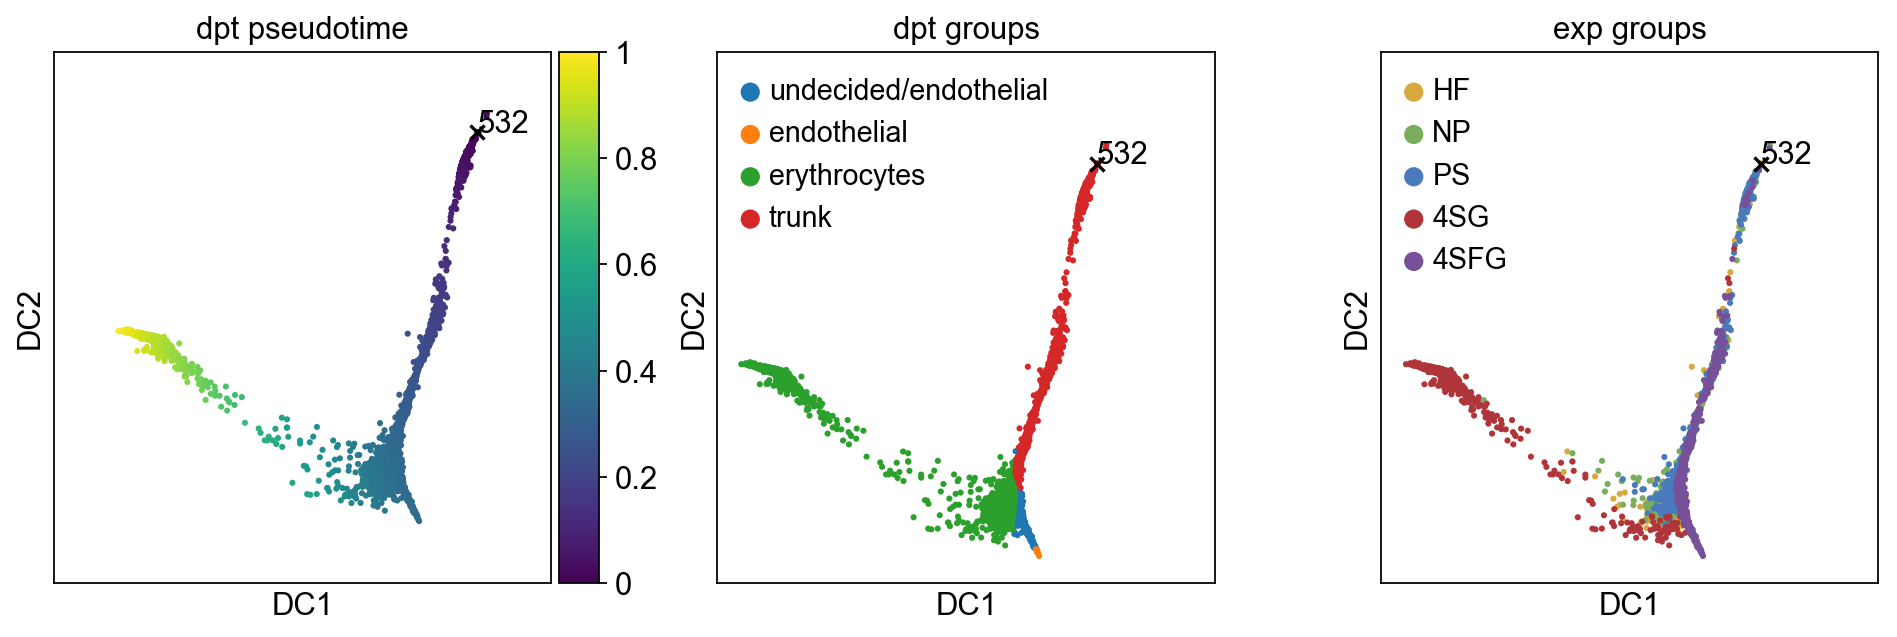

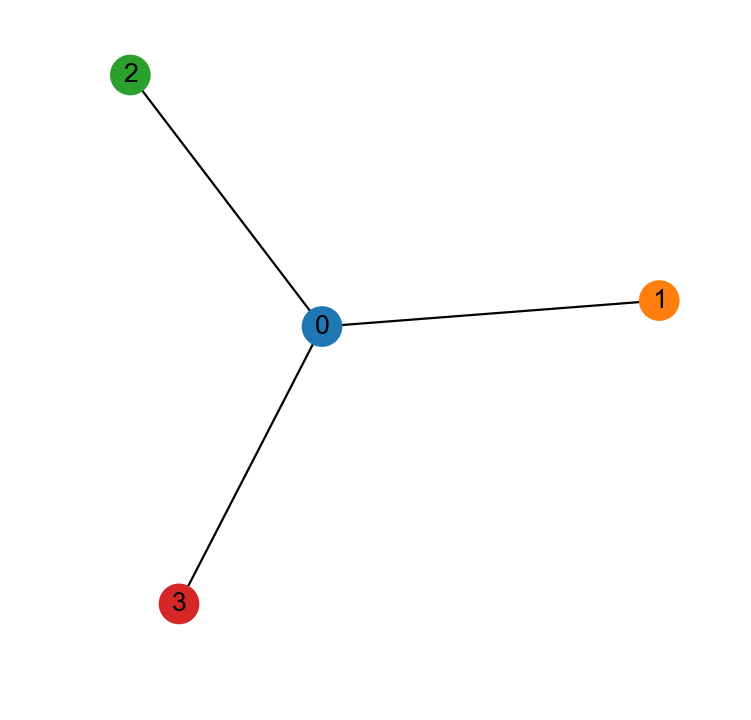

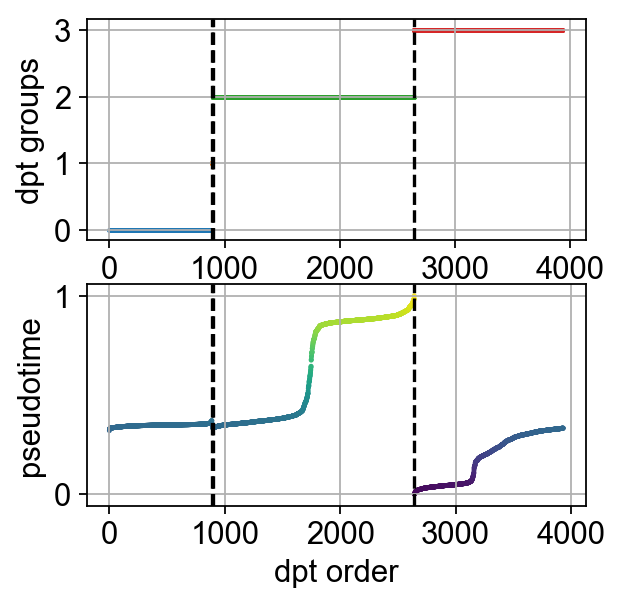

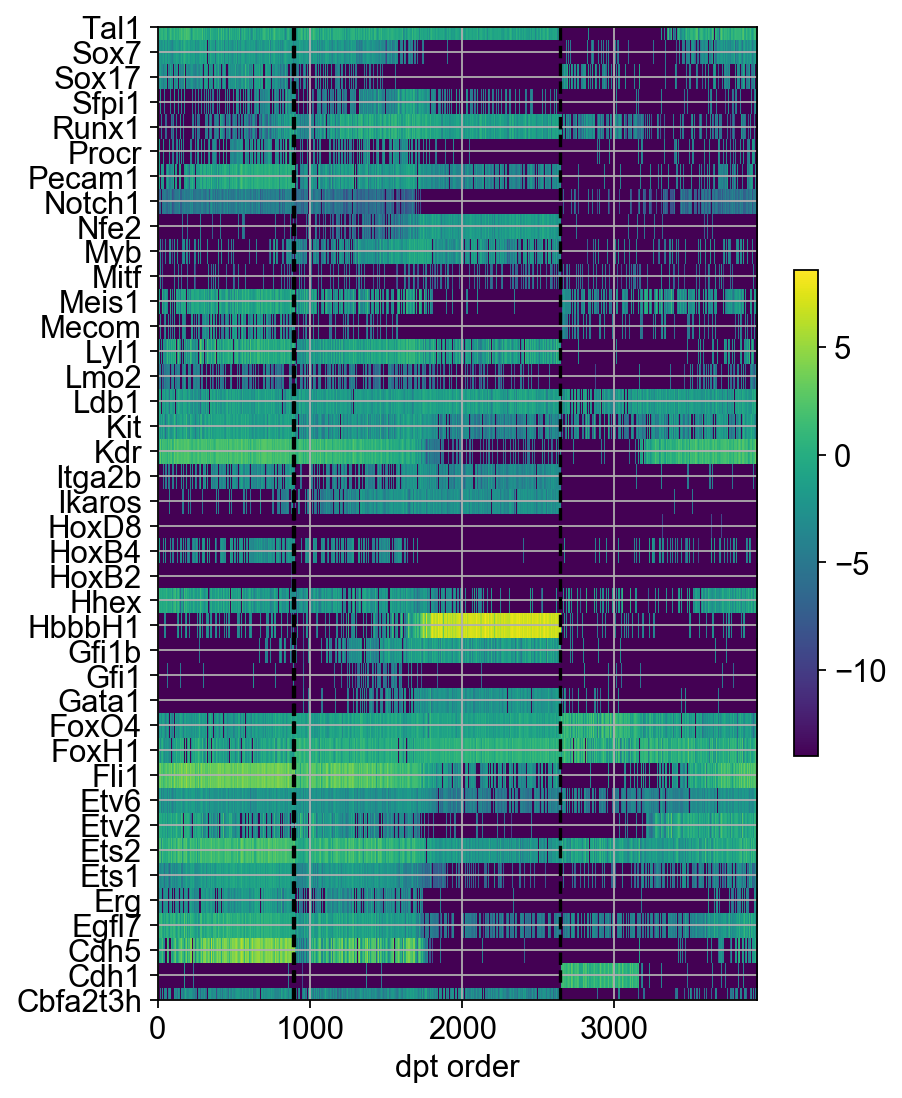

In [5]:
adata.add['dpt_groups_names'] = ['undecided/endothelial', 'endothelial', 'erythrocytes', 'trunk'] # optional
sc.pl.dpt(adata, color=['dpt_pseudotime', 'dpt_groups', 'exp_groups'], legendloc='upper left')